# About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [809]:
import pandas as pd
import numpy as np
import re

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [810]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Task 1 
1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

## Number of columns and rows

In [811]:
(rows,columns) = df.shape
print(f'{columns=},{rows=}')

columns=13,rows=148654


## Each column type

In [812]:
columns_to_types = [(column,df[column].dtype) for column in df.columns ]  
columns_to_types

[('Id', dtype('int64')),
 ('EmployeeName', dtype('O')),
 ('JobTitle', dtype('O')),
 ('BasePay', dtype('float64')),
 ('OvertimePay', dtype('float64')),
 ('OtherPay', dtype('float64')),
 ('Benefits', dtype('float64')),
 ('TotalPay', dtype('float64')),
 ('TotalPayBenefits', dtype('float64')),
 ('Year', dtype('int64')),
 ('Notes', dtype('float64')),
 ('Agency', dtype('O')),
 ('Status', dtype('float64'))]

Letiral columns

In [813]:
[column for (column,_) in list(filter(lambda x: x[1] == 'O',columns_to_types))]

['EmployeeName', 'JobTitle', 'Agency']

Numerical colmns

In [814]:
[column for (column,_) in list(filter(lambda x: x[1] == 'float64',columns_to_types))]

['BasePay',
 'OvertimePay',
 'OtherPay',
 'Benefits',
 'TotalPay',
 'TotalPayBenefits',
 'Notes',
 'Status']

## Checking for missing values

In [815]:
[(column,df[column].isna().sum()) for column in df.columns]

[('Id', 0),
 ('EmployeeName', 0),
 ('JobTitle', 0),
 ('BasePay', 609),
 ('OvertimePay', 4),
 ('OtherPay', 4),
 ('Benefits', 36163),
 ('TotalPay', 0),
 ('TotalPayBenefits', 0),
 ('Year', 0),
 ('Notes', 148654),
 ('Agency', 0),
 ('Status', 148654)]

We note that 'Notes' and 'Status' columns are empty

# Task 2
2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

In [816]:
salaries = df.TotalPay
mean = salaries.mean()
median = salaries.median()
mode = salaries.mode()[0]  
min = salaries.min()
max = salaries.max()
salary_range = max - min
std = salaries.std()

print(f'mean={mean:.2f}')
print(f'median={median:.2f}')
print(f'mode={mode:.2f}')
print(f'minimum={min:.2f}')
print(f'maximum={max:.2f}')
print(f'range={salary_range:.2f}')
print(f'std={std:.2f}')

mean=74768.32
median=71426.61
mode=0.00
minimum=-618.13
maximum=567595.43
range=568213.56
std=50517.01


From the mode value we conclude that most of the salaries are 0 

# Task 3

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

Remove empty columns

In [817]:
before_remove_columns = df.columns
len(before_remove_columns), before_remove_columns

(13,
 Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
        'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
        'Status'],
       dtype='object'))

In [818]:
df= df.dropna(axis=1, how='all')
after_remove_columns = df.columns
removed_columns = set(before_remove_columns) - set(after_remove_columns)
removed_columns

{'Notes', 'Status'}

In [819]:
columns_to_null_count = [(column,df[column].isna().sum()) for column in df.columns]
nullable_columns = filter(lambda column: column[1] > 0 , columns_to_null_count)
list(nullable_columns)

[('BasePay', 609), ('OvertimePay', 4), ('OtherPay', 4), ('Benefits', 36163)]

In [820]:
df[df.OvertimePay.isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
148646,148647,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.0,0.0,2014,San Francisco


We don't have any information about those employees so I will remove them

In [821]:
df = df[df.OvertimePay.notna()]
df[df.OvertimePay.isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency


Check how many null values still there

In [822]:
columns_to_null_count = [(column,df[column].isna().sum()) for column in df.columns]
nullable_columns = filter(lambda column: column[1] > 0 , columns_to_null_count)
list(nullable_columns)

[('BasePay', 605), ('Benefits', 36159)]

See some rows that has null BaseBay

In [823]:
df[df.BasePay.isna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
81391,81392,Kevin P Cashman,Deputy Chief 3,NaN,0.0,149934.11,0.00,149934.11,149934.11,2013,San Francisco
84506,84507,Demetrya Mullens,Licensed Vocational Nurse,NaN,0.0,110485.41,20779.00,110485.41,131264.41,2013,San Francisco
84960,84961,Michael M Horan,Park Patrol Officer,NaN,0.0,120000.00,8841.48,120000.00,128841.48,2013,San Francisco
90525,90526,Thomas Tang,Police Officer 3,NaN,0.0,106079.31,0.00,106079.31,106079.31,2013,San Francisco
90786,90787,Michael C Hill,Deputy Sheriff,NaN,0.0,81299.02,23877.53,81299.02,105176.55,2013,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
110526,110527,Arthur L Curry,PS Aide Health Services,NaN,0.0,10.67,0.00,10.67,10.67,2013,San Francisco
110527,110528,Nereida Vega,Senior Clerk,NaN,0.0,5.56,0.00,5.56,5.56,2013,San Francisco
110528,110529,Timothy E Gibson,Police Officer 3,NaN,0.0,0.00,-2.73,0.00,-2.73,2013,San Francisco
110529,110530,Mark E Laherty,Police Officer 3,NaN,0.0,0.00,-8.20,0.00,-8.20,2013,San Francisco


See some rows that has a BaseBay

In [824]:
df[df.BasePay.notna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,San Francisco
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,San Francisco
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,San Francisco
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,San Francisco
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.0,0.00,0.00,2014,San Francisco


We can conclude that:<br>
TotalPay = BasePay + OvertimePay + OtherPay ==> <br>
BasePay = TotalPay - OvertimePay - OtherPay 

In [825]:
df.loc[df.BasePay.isnull(), 'BasePay'] = df.TotalPay - df.OvertimePay - df.OtherPay

Check how many null values still there

In [826]:
columns_to_null_count = [(column,df[column].isna().sum()) for column in df.columns]
nullable_columns = filter(lambda column: column[1] > 0 , columns_to_null_count)
list(nullable_columns)

[('Benefits', 36159)]

In [827]:
df[df.Benefits.notna()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,San Francisco
36160,36161,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,San Francisco
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,San Francisco
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,San Francisco
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,San Francisco
...,...,...,...,...,...,...,...,...,...,...,...
148645,148646,Carolyn A Wilson,Human Services Technician,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148647,148648,Joann Anderson,Communications Dispatcher 2,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148648,148649,Leon Walker,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,San Francisco


As the previous column we can conclude that:<br>
TotalPayBenefits = TotalPay + Benefits ==><br>
Benefits = TotalPayBenefits - TotalPay

In [828]:
df.loc[df.Benefits.isna(),'Benefits'] = df.TotalPayBenefits - df.TotalPay

Last check

In [829]:
columns_to_null_count = [(column,df[column].isna().sum()) for column in df.columns]
nullable_columns = filter(lambda column: column[1] > 0 , columns_to_null_count)
list(nullable_columns)

[]

## Explanation
At first I tried to remove the small amount of empty values and relized that those rows are completely empty so I remove them.
I relized that The BasePay and the Benefits columns can be calculated from other columns by finding the relationship between 'pay' columns

# Task 4
4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

In [830]:
salaries = df.TotalPay # we need to assign it again because we have cleaned the data
salaries

0         567595.43
1         538909.28
2         335279.91
3         332343.61
4         326373.19
            ...    
148645         0.00
148647         0.00
148648         0.00
148649         0.00
148653      -618.13
Name: TotalPay, Length: 148650, dtype: float64

567595.43

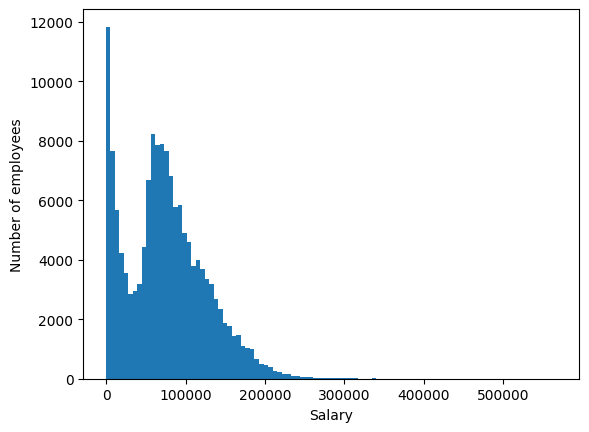

In [831]:
import matplotlib.pyplot as plt 
plt.hist(salaries,bins = 100);
plt.xlabel('Salary')
plt.ylabel('Number of employees')
salaries.max()

In [832]:
len(df.JobTitle.unique())

2158

In [833]:
df.JobTitle.unique()[:40]

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC',
       'DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)',
       'ASSISTANT DEPUTY CHIEF II', 'BATTALION CHIEF, (FIRE DEPARTMENT)',
       'DEPUTY DIRECTOR OF INVESTMENTS',
       'CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)',
       'ASSISTANT CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)',
       'EXECUTIVE CONTRACT EMPLOYEE', 'DEPARTMENT HEAD V',
       'COMMANDER III, (POLICE DEPARTMENT)',
       'CAPTAIN, EMERGENCYCY MEDICAL SERVICES',
       'ASSISTANT MEDICAL EXAMINER', 'CAPTAIN, FIRE SUPPRESSION',
       'CHIEF OF POLICE', 'DEPUTY CHIEF III (POLICE DEPARTMENT)',
       'INSPECTOR III, (POLICE DEPARTMENT)',
       'ELECTRONIC MAINTENANCE TECHNICIAN',
       'ADMINISTRATOR, SFGH MEDICAL CENTER',
       'LIEUTENANT III (POLICE DEPARTMENT)', 'FIREFIGHTER',
       'NURSING SUPERVISOR PSYCHIATRIC', 'MAYOR',
       'LIEUTENANT, FIRE DEPARTMENT', 'INCIDENT 

By looking to job titles I will try to get a shared set of attribute to distinguish between different departments

In [834]:
def remove_unwanted_words(job):
    return job.replace("senior"," ").replace("junior"," ").replace("specialist"," ").replace("account"," ")

def remove_symbols(job):
    return re.sub(r'[;.\-&/|$]+',' ',job).strip()

def remove_duplicates(job):
    return re.sub(r'(.)\1+', r'\1', job)

def remove_single_char_word(job):
    return ' '.join(filter(lambda word: len(word) > 3,job.split(' '))).strip()

In [835]:
remove_unwanted_words("senior physician specialist")

'  physician  '

In [836]:
def get_department_from_job_title(job_title):
    job_title = job_title.strip().lower()
    
    title_without_senior = remove_unwanted_words(job_title)
    title_without_duplicates = remove_duplicates(title_without_senior)
    title_without_symbols = remove_symbols(title_without_duplicates)
    title_without_signle_char = remove_single_char_word(title_without_symbols)
    job_title = re.sub(r'\s+',' ',title_without_signle_char).strip().lower().replace("firefighter","fire fighter")
    out = ''
    if '(' in job_title:
        startIndex = job_title.index('(')+1
        endIndex = job_title.index(')')
        out= job_title[startIndex:endIndex]
    elif ',' in job_title:
        out= job_title[job_title.index(',')+1:]
    else:
        out=  job_title
    return re.sub(r'\s',' ',out).strip()

In [837]:
df['Department'] = df.JobTitle.apply(get_department_from_job_title)

In [838]:
df = df.dropna() # I need this dropna because for some reason an empty row is added
len(df.Department.unique())

1105

Showing some departments those have been extracted from job titles

In [839]:
df.Department.unique()[:100]

array(['general manager metropolitan transit authority',
       'police department', 'wire rope cable maintenance mechanic',
       'fire department', 'asistant deputy chief',
       'deputy director investments', 'executive contract employe',
       'department head', 'emergencycy medical services',
       'asistant medical examiner', 'fire supresion', 'chief police',
       'electronic maintenance technician', 'sfgh medical center',
       'fire fighter', 'nursing supervisor psychiatric', 'mayor',
       'incident suport', 'anesthetist', 'district atorney',
       'asistant supervisor', 'port director',
       'bureau fire prevention public', 'physician',
       'fire fighter paramedic', 'manager', 'transit supervisor',
       'deputy director municipal transportation', 'nursing supervisor',
       'police oficer', "sherif's lieutenant", 'deputy director',
       'supervising physician', 'forensic toxicologist', 'civil criminal',
       'deputy sherif', 'nurse manager',
       'elect

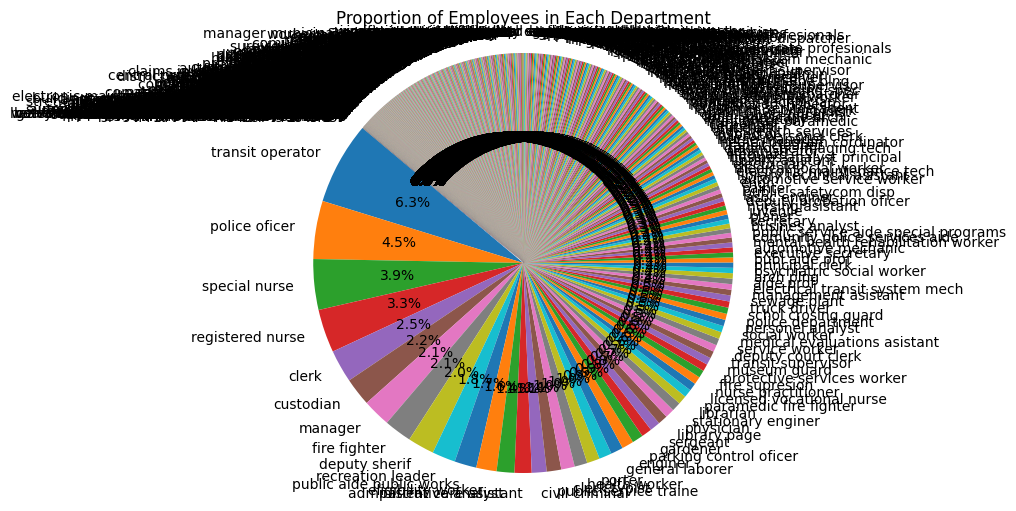

In [840]:
# Count the number of employees in each department
department_counts = df['Department'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Employees in Each Department')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

I did my best to conclude all departments 

# Task 5
5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.


In [841]:
by_agency = df.groupby('Agency')['TotalPay'].describe()
by_agency


,count,mean,std,min,25%,50%,75%,max
Agency,,,,,,,,
San Francisco,148650.0,74770.333901,50516.196009,-618.13,36169.955,71427.24,105842.96,567595.43


Agency column has no valuable information 

In [842]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency',
       'Department'],
      dtype='object')

In [843]:
by_year = df.groupby('Year')['TotalPay'].describe()
by_year

,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2011,36159.0,71744.103871,47498.706594,0.00,36810.7600,68213.240,102512.68,567595.43
2012,36766.0,74113.262265,49523.904319,0.00,37560.6075,70714.680,104099.17,362844.66
2013,37606.0,77611.443142,52854.774783,0.00,36754.9950,74500.015,109637.67,347102.32
2014,38119.0,75471.836912,51694.645115,-618.13,33468.1250,72366.280,107977.95,471952.64


The avarage salary and the number of employee are gorwing with the year 

In [844]:
df['JobTitle'] = df['JobTitle'].str.lower()
filtered_df = df.groupby([ 'JobTitle']).filter(lambda x: len(x) > 500)

# Calculate statistics for the filtered groups
statistics = filtered_df.groupby(['JobTitle'])['TotalPay'].describe().round(2)
statistics = statistics.sort_values(by='mean', ascending=False)
statistics

,count,mean,std,min,25%,50%,75%,max
JobTitle,,,,,,,,
"lieutenant, fire suppression",572.0,181387.42,34287.66,11646.58,161352.45,179160.34,201860.39,362844.66
sergeant 3,1047.0,164651.76,30604.11,67.42,153758.62,163957.31,177881.19,252496.26
firefighter,3153.0,144222.33,44096.08,0.00,130134.67,147439.05,170245.10,290076.13
police officer 2,1141.0,136563.47,27466.94,115.78,126281.83,136344.89,148974.40,262317.85
attorney (civil/criminal),1503.0,135477.02,46765.35,0.00,110365.96,148424.94,171043.77,224998.62
police officer 3,2421.0,134906.89,38401.94,0.00,127541.42,137768.89,153913.10,267902.74
emt/paramedic/firefighter,918.0,133186.60,55553.15,0.00,96220.40,134523.17,169998.58,337204.86
senior physician specialist,526.0,131082.58,67128.14,304.57,84408.96,140453.63,185681.83,322886.84
police officer iii,779.0,127834.40,28256.60,597.31,119495.24,127595.55,139803.60,220356.48


From these groups we can see the variance between salaries of the jobs , for example the fire suppression takes the heighest mean salaries while the jonior clerk takes only around 6000 

# Task 6
6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.


We already know that the TotalPay can be generated from the salary and other columns 

In [845]:
df.TotalPay.corr(df.BasePay)

0.9546898576409013

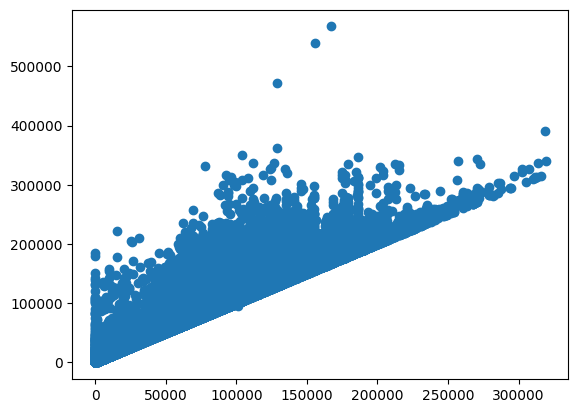

In [846]:
plt.scatter(df.BasePay,df.TotalPay)

In [847]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency',
       'Department'],
      dtype='object')

In [848]:
df.TotalPay.corr(df.TotalPayBenefits)

0.9773115058435718

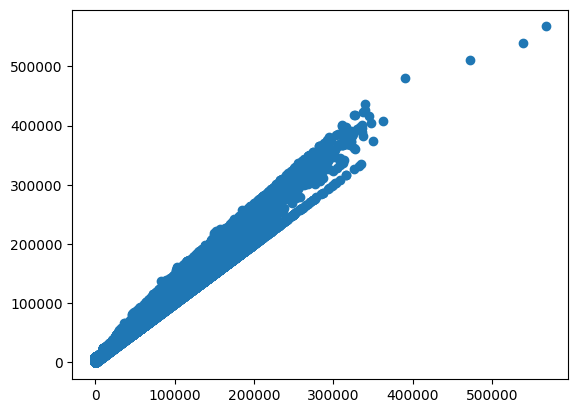

In [849]:
plt.scatter(df.TotalPay,df.TotalPayBenefits)

This relation is better than the previous one because it is almost linear


# Task 7
7. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

## Conclusion
The data collection focused on employees somewhere in San Francisco, where there are many jobs. During the analysis and cleaning, empty and useless columns were found and eliminated. It was noted that there was a large variance between employees’ salaries according to their position. In addition, the biggest problem was the large number of job titles and their writing formats, also the 0 BasePay was suspicious and maybe we should eleminate it.